## Setting
- dataset: cifar 100
- preprocessing: random cropping, flipping, brightness and contrast
  same as in https://github.com/tensorflow/models/tree/master/slim
  
- model: cifarnet (also from tensorflow slim repo)

A few baselines: 
- training cifarnet supervised on full dataset with slim repo code: 42% error
- "" with my code and matching hyperparameters: 43% error

## Experiments

All following experiments are done with a split of 20% supervised / 80% unsupervised samples, so 100 supervised samples per class. Experiments have been done using a rough grid search of parameters. Visit and Walker weight have been set to 0.2 and 0.5 respectively. Results of multiple runs have been averaged. However, no validation set was used to pick hyperparemters, instead everything was evaluated directly on the test set, so those results only give a direction.


### standard dataset (predict 100 fine labels)
| type  |  error rate  | comment
|---|---|---
| supervised | ~58%  |  batch 128
| semisup  | ~56.5%  |  batch 128/128 

### predict only 20 coarse labels
| type  |  error rate  |  comment
|---|---|---
| supervised  | ~61%  |  batch 128
| semisup  | ~60%  | batch 128/128  

### multitask: predict coarse and fine labels, walker loss only on 20 coarse labels
| type  |  error rate on coarse |  error on fine | comment
|---|---|---|---
| supervised  | ~56%  |  ~57%  | batch 128
| semisup | ~56.5%  |  ~57% | batch 128


### multitask: predict coarse and fine labels, walker loss on both labels
| type  |  error rate on coarse |  error on fine | comment
|---|---|---|---
| supervised  | ~56%  |  ~57%  | same setting as above, batch 128
| semisup | ~56.5%  |  ~57% | batch 128/128
| semisup | **~54.5%**  |  **~56%** | batch 256/256

walker loss decreases slightly: (this is for coarse labels, fine labels look similar)
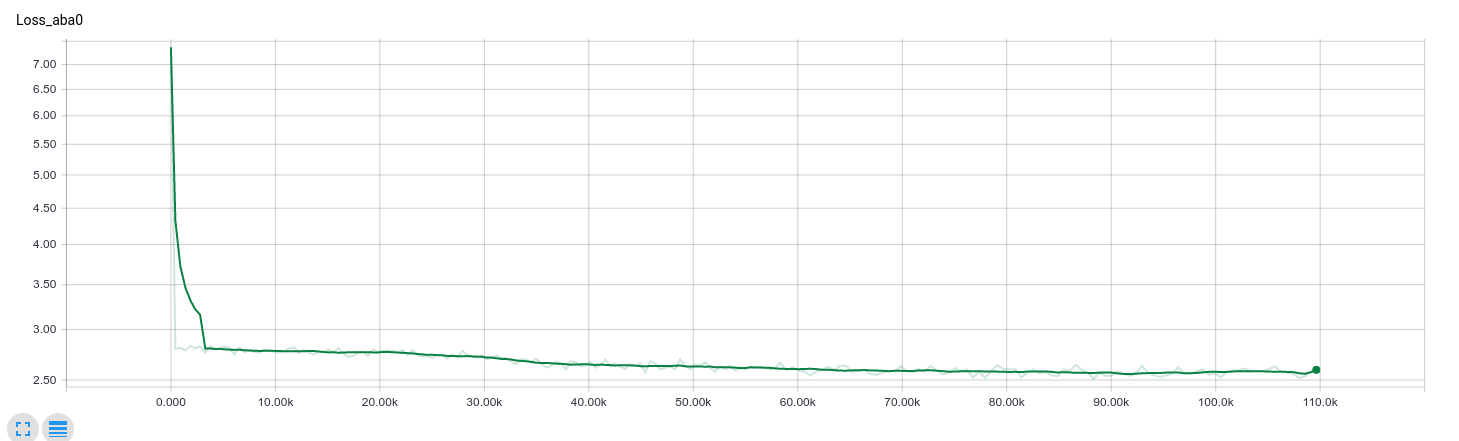

walk accuracy increases accordingly (this is for coarse labels)
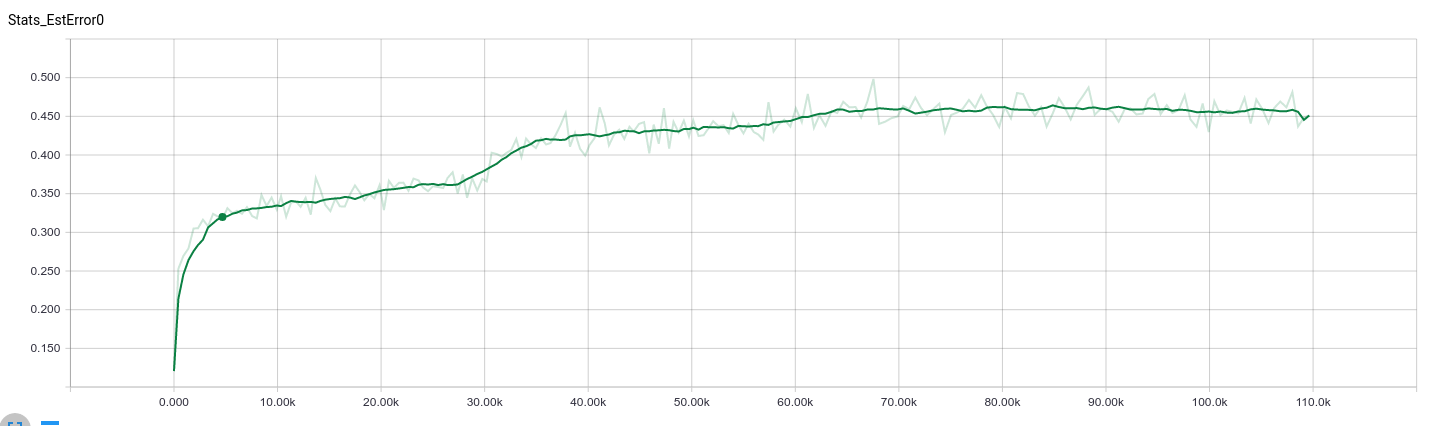

## Conclusions
- semisupervised training helps
- multitask learning helps
- both effects are not very strong
- predicting coarse labels is only slightly easier than fine labels

- more testing of batch size should be done